# Data Analysis/Data Visualization Report: Bike Ride Trends and Biker Types of Ford GoBike System November,2019
## by Rahaf Alharbi

## Investigation Overview

>Investigation Overview
In this investigation, I will to look at the bike ride trends and biker type of the bay Area bike share system. The main focus was on biking duration, the time (weekday, hour), and the bike types.

## Dataset Overview

> This document explores the Ford GoBike's trip data for public containing bike rides from April FY2019. The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age. 16K data points were removed from the analysis due to missing values in some fields, data inconsistent, or outliner issues.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_master_file.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222660 entries, 0 to 222659
Data columns (total 20 columns):
duration_sec               222660 non-null int64
start_time                 222660 non-null object
end_time                   222660 non-null object
start_station_id           222660 non-null float64
start_station_name         222660 non-null object
start_station_latitude     222660 non-null float64
start_station_longitude    222660 non-null float64
end_station_id             222660 non-null float64
end_station_name           222660 non-null object
end_station_latitude       222660 non-null float64
end_station_longitude      222660 non-null float64
bike_id                    222660 non-null int64
user_type                  222660 non-null object
member_birth_year          222660 non-null int64
member_gender              222660 non-null object
bike_share_for_all_trip    222660 non-null object
start_time_dayofweek       222660 non-null object
start_time_hour            222660 no

In [4]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_time_dayofweek'] = df['start_time_dayofweek'].astype(ordered_weekdays)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222660 entries, 0 to 222659
Data columns (total 20 columns):
duration_sec               222660 non-null int64
start_time                 222660 non-null object
end_time                   222660 non-null object
start_station_id           222660 non-null float64
start_station_name         222660 non-null object
start_station_latitude     222660 non-null float64
start_station_longitude    222660 non-null float64
end_station_id             222660 non-null float64
end_station_name           222660 non-null object
end_station_latitude       222660 non-null float64
end_station_longitude      222660 non-null float64
bike_id                    222660 non-null int64
user_type                  222660 non-null object
member_birth_year          222660 non-null int64
member_gender              222660 non-null object
bike_share_for_all_trip    222660 non-null object
start_time_dayofweek       222660 non-null category
start_time_hour            222660 

## Bike Ride Duration Time Visualization:

### The origianl duration data has right skew issue - bike durations range from less than 1 minute to 1400+ minutes with median at around 9 min and mean at around 12 min.

### We have to do some data transformation to make data visualization and data interpretation easiler. Below are the plots before/after data transformation.



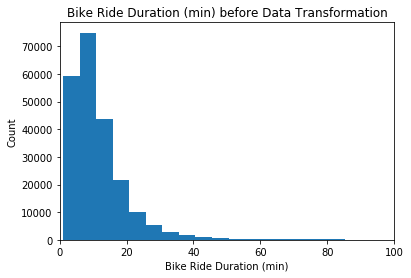

In [6]:
plt.hist(data = df, x = 'duration_min', bins = 20);
plt.xlim(0, 100);
plt.xlabel("Bike Ride Duration (min)");
plt.ylabel("Count");
plt.title("Bike Ride Duration (min) before Data Transformation");

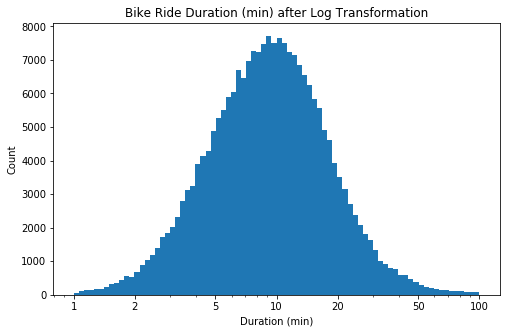

In [7]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel('Duration (min)');
plt.ylabel('Count');
plt.title("Bike Ride Duration (min) after Log Transformation");

## Daily/Weekly Bike Ride Trends and Biker Type Visualization:
**Features investigated include the following: Start Time Hour, Start Time DayofWeek, Member Gender, and User Type.**

**Observations from below plots:**
> - Tuesday, 5:00 PM has the highest biker counts across 7 days, 24 hours.
> - 5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
> - 5:00 PM has the most 'Subscriber' bikers compared to other hours. It also has the most 'Customer' bikers compared to other hours.
> - Tuesday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
> - Tuesday has the most 'Subscriber' bikers compared to other days. Saturday has the most 'Customer' bikers compared to other days.
> - Most 'Subscriber' are male. Most 'Customer' bikers are also male.

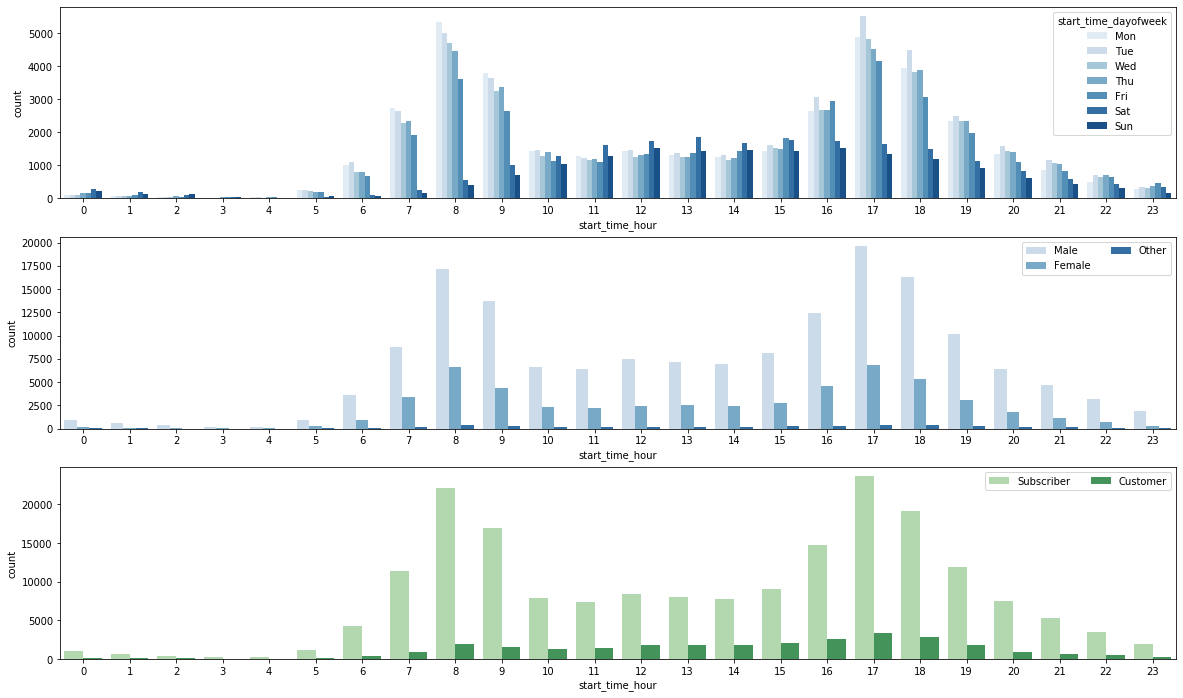

In [8]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 12]);

plt.subplot(3, 1, 1);
sb.countplot(data = df, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Blues');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping


ax = plt.subplot(3, 1, 3);
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

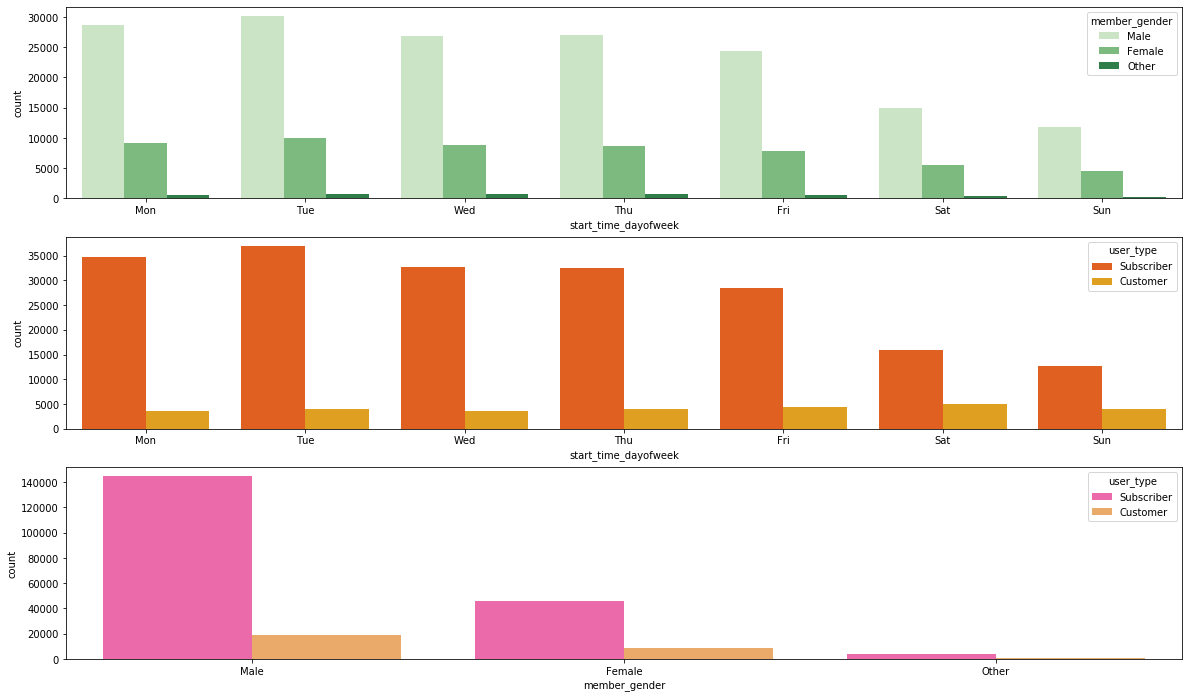

In [9]:
plt.figure(figsize = [20, 12]);

ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'user_type', palette = 'autumn');

ax = plt.subplot(3, 1, 3);

sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'spring');

## Bike Ride Durations for Different Age Group Across DayofWeek and Hour Visulization:
**Observations:**
> - By looking at the errorbars in both pointplots below, we can tell that there are more younger bikers (age < 40) across 7 days and 24 hours.
> - Bikers on Saturday and Sunday bike longer compared to bikers on other days.



In [10]:
# **Let's devide bikers into 2 groups by age: 1 group has bikers below 40 years old, another group has bikers above 40 years old.**
age_flag1 = (df['member_age'] < 40)
age_below_forty = df.loc[age_flag1,:]

age_flag2 = (df['member_age'] >= 40)
age_above_forty = df.loc[age_flag2,:]

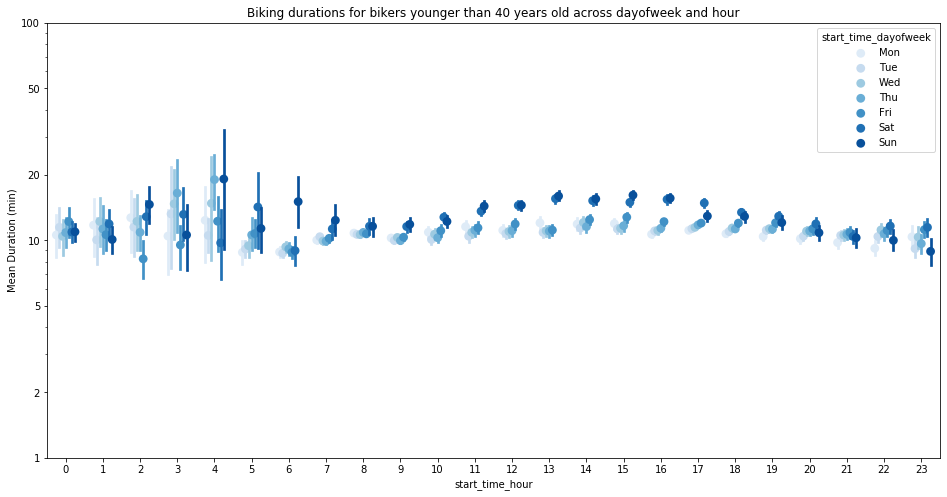

In [11]:
fig = plt.figure(figsize = [16,8])
ax = sb.pointplot(data = age_below_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);
plt.title('Biking durations for bikers younger than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);


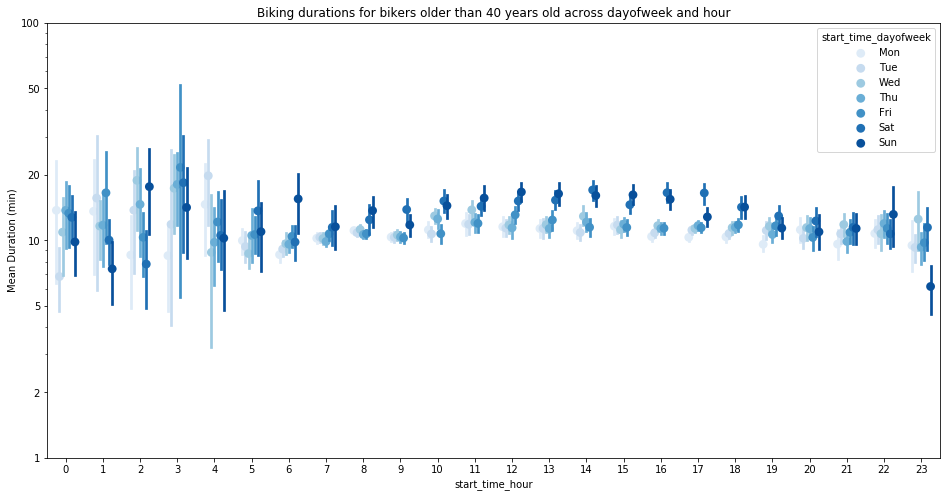

In [12]:
fig = plt.figure(figsize = [16,8])
ax = sb.pointplot(data = age_above_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);
plt.title('Biking durations for bikers older than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);
